In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



df=pd.read_csv('/Users/Marina/Documents/hinge/ratings_sample.csv', encoding='ISO-8859-1')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500763 entries, 0 to 500762
Data columns (total 30 columns):
like                          500763 non-null int64
player_id                     500763 non-null object
subject_id                    500763 non-null object
player_age                    500763 non-null int64
player_height                 500763 non-null int64
player_age_max                500763 non-null int64
player_age_min                500763 non-null int64
player_distance_max           500763 non-null int64
player_height_min             500763 non-null int64
player_height_max             500763 non-null int64
subject_age                   500763 non-null int64
subject_height                500763 non-null int64
subject_age_max               500763 non-null int64
subject_age_min               500763 non-null int64
subject_distance_max          500763 non-null int64
subject_height_min            500763 non-null int64
subject_height_max            500763 non-null int64
pla

## PART1

There are 2,762 unique player IDs and 19,942 unique subject IDs in the data set.

In [3]:
df[['player_id', 'subject_id']].nunique()

player_id      2762
subject_id    19942
dtype: int64

59.56% of players are straight males; 38.62% are straight females; 1.18% are bi females; 0.39% are gay males; 0.21% are gay females; and 0.02% are bi males.

In [4]:
df['player_gender_orientation'].value_counts(normalize=True)

MS    0.595575
FS    0.386293
FB    0.011802
MG    0.003940
FG    0.002099
MB    0.000292
Name: player_gender_orientation, dtype: float64

The distribution is slightly different among subjects. 56.26 % of subjects are straight males; 39.81% are straight females; 3.25% are bi females; 0.36% are gay males; 0.16 % are gay females; and 0.15% are bi males.

Interestingly, in this sample, bi males and bi females prefer being a subject to being a player. Straigt males, however, prefer being a player. 

In [5]:
df['subject_gender_orientation'].value_counts(normalize=True)

FS    0.562607
MS    0.398198
FB    0.032504
MG    0.003646
FG    0.001586
MB    0.001458
Name: subject_gender_orientation, dtype: float64

There are 19,969 users in the data set.

In [6]:
list1=df['subject_id'].unique().tolist()
list2=df['player_id'].unique().tolist()

In [7]:
pd.concat([df['subject_id'], df['player_id']]).unique().shape[0]


19969

2,735 (13.70%) users appear both as a player and a subject.

In [8]:
len(set(list1).intersection(list2))

2735

In [9]:

count = 0
for num in list1:
    if num in list2:
        count += 1
print (count)

2735


In [10]:
2735/19969*100

13.696229155190546

In [11]:

df_like=df.loc[df['like'] ==1];
len(df_like)

87899

Approximately 16% of users went outside of their declared distance preferences. That is, they liked someone who live farther than they prefered.

In [12]:
def distance(distance,player_distance_max):
    if distance > player_distance_max:
        return 1
    else:
        return 0

df_like['distance_diff']=df_like.apply(lambda x: distance(x['distance']\
                                                            ,x['player_distance_max']), axis=1)

df_like['distance_diff'].value_counts(normalize=True)

0    0.839463
1    0.160537
Name: distance_diff, dtype: float64

However, only 5.6% of players would prefer someone who is either older or younger than their preferred age. 

In [13]:
def age(subject_age,player_age_min,player_age_max):
    if subject_age < player_age_min or subject_age > player_age_max:
        return 1
    else:
        return 0

df_like['age_diff']=df_like.apply(lambda x: age(x['subject_age']\
                                                            ,x['player_age_min'],x['player_age_max'] ), axis=1)

df_like['age_diff'].value_counts(normalize=True)

0    0.944266
1    0.055734
Name: age_diff, dtype: float64

And even fewer players (0.7%) would prefer someone who is either taller or shorter than they originally preferred.

In [14]:
def height(subject_height,player_height_min,player_height_max):
    if subject_height < player_height_min or subject_height > player_height_max:
        return 1
    else:
        return 0

df_like['height_diff']=df_like.apply(lambda x: height(x['subject_height']\
                                                            ,x['player_height_min'],x['player_height_max'] ), axis=1)

df_like['height_diff'].value_counts(normalize=True)

0    0.993163
1    0.006837
Name: height_diff, dtype: float64

None of players liked someone who did not match their sexual orientations.


In [15]:
def orient(player_gender_orientation,subject_gender_orientation):
    if player_gender_orientation=='MS' and subject_gender_orientation=='FS':
        return 0
    if player_gender_orientation=='FS' and subject_gender_orientation=='MS':
        return 0
    if player_gender_orientation=='FG' and subject_gender_orientation=='FG':
        return 0
    if player_gender_orientation=='MG' and subject_gender_orientation=='MG':
        return 0
    if player_gender_orientation=='MB' and subject_gender_orientation=='MB' or subject_gender_orientation =='FB' or subject_gender_orientation=='MG' or subject_gender_orientation=='FS' or subject_gender_orientation=='MS':
        return 0
    if player_gender_orientation=='FB' and subject_gender_orientation =='FB' or subject_gender_orientation =='MB' or subject_gender_orientation=='FG' or subject_gender_orientation=='FS' or subject=='MS' :
        return 0
    else: 
        return 1

df_like['orient_diff']=df_like.apply(lambda x: orient(x['player_gender_orientation']\
                                                            ,x['subject_gender_orientation']), axis=1)

df_like['orient_diff'].value_counts(normalize=True)

0    1.0
Name: orient_diff, dtype: float64

I find these findings very interesting. While many players do not mind to have long distance relationship or even date someone who is older or younger than their ideal partner, they seem to be more uptight when it comes to height, and none of players would not match sexual preferences. It seems that height and sexual orientation are very important factors in mating, even more important than age and distance. 

In [16]:
df_like['all_diff']=df_like['height_diff']+df_like['age_diff']+df_like['distance_diff']

20.69% of players go outside of their declared preferences. 19.15% would go outside of their declared preferences based on only one characteristic, 1.42 % would go outside of their declared preferences based on two characteristics, and only 0.12% would go outside of their declared preferences based on three characteristics.

In [17]:
df_like['all_diff'].value_counts(normalize=True)

0    0.793138
1    0.191595
2    0.014289
3    0.000978
Name: all_diff, dtype: float64

Almost an equal number of players 2.7% vs. 2.9% would like someone younger or older than their declared age.

In [18]:
def younger(subject_age,player_age_min):
    if subject_age < player_age_min:
        return 1
    else:
        return 0

df_like['younger']=df_like.apply(lambda x: younger(x['subject_age']\
                                                            ,x['player_age_min']), axis=1)

df_like['younger'].value_counts(normalize=True)

0    0.972958
1    0.027042
Name: younger, dtype: float64

In [19]:
def older(subject_age,player_age_max):
    if subject_age > player_age_max:
        return 1
    else:
        return 0

df_like['older']=df_like.apply(lambda x: older(x['subject_age']\
                                                            ,x['player_age_max']), axis=1)

df_like['older'].value_counts(normalize=True)

0    0.971308
1    0.028692
Name: older, dtype: float64

However, as seen below, if players go outside of their declared age, straight females players and gay male players prefer younger subjects while straight male players prefer older subjects.

In [20]:
df_like.groupby('player_gender_orientation')['older','younger'].sum().reset_index()

,player_gender_orientation,older,younger
0,FB,27,25
1,FG,5,4
2,FS,320,626
3,MB,0,1
4,MG,7,15
5,MS,2163,1706


Similarly, equal number of players 0.32% vs. 0.37% would like someone taller or shorter than their declared height.

In [21]:
def taller(subject_height,player_height_max):
    if subject_height > player_height_max:
        return 1
    else:
        return 0

df_like['taller']=df_like.apply(lambda x: taller(x['subject_height']\
                                                            ,x['player_height_max']), axis=1)

df_like['taller'].value_counts(normalize=True)

0    0.996837
1    0.003163
Name: taller, dtype: float64

In [22]:
def shorter(subject_height,player_height_min):
    if subject_height < player_height_min:
        return 1
    else:
        return 0

df_like['shorter']=df_like.apply(lambda x: shorter(x['subject_height']\
                                                            ,x['player_height_min']), axis=1)

df_like['shorter'].value_counts(normalize=True)

0    0.996325
1    0.003675
Name: shorter, dtype: float64

However, if players go outside of their declared height, straight females and bi females would choose shorter subjects more while straight males would choose taller subjects more.

In [23]:
df_like.groupby('player_gender_orientation')['taller','shorter'].sum().reset_index()

,player_gender_orientation,taller,shorter
0,FB,0,19
1,FG,0,0
2,FS,8,102
3,MB,0,0
4,MG,2,2
5,MS,268,200


The table below indicates that bi male, straight males, and bi females players prefer younger subjects, while straight females players prefer older subjects.

In [182]:
df_like.groupby(['player_gender_orientation'])['player_age','subject_age'].mean().reset_index()

,player_gender_orientation,player_age,subject_age
0,FB,25.584746,28.226695
1,FG,29.491379,30.068966
2,FS,27.813495,29.548883
3,MB,35.384615,31.076923
4,MG,28.308311,27.919571
5,MS,29.076614,26.799975


In [65]:
df['player_gender']= df['player_gender_orientation'].apply(lambda x: "male" if x[0]=="M" else "female");
df['player_gender'].value_counts(normalize=True)

male      0.599807
female    0.400193
Name: player_gender, dtype: float64

Below is the distribution of age among players by gender. Most of the female players are in their mid-twenties or early thirties while male players are in their late twenties and early thirties.

In [122]:
y_ms = df['player_age'][df['player_gender'] == 'male']
y_fs = df['player_age'][df['player_gender'] == 'female']

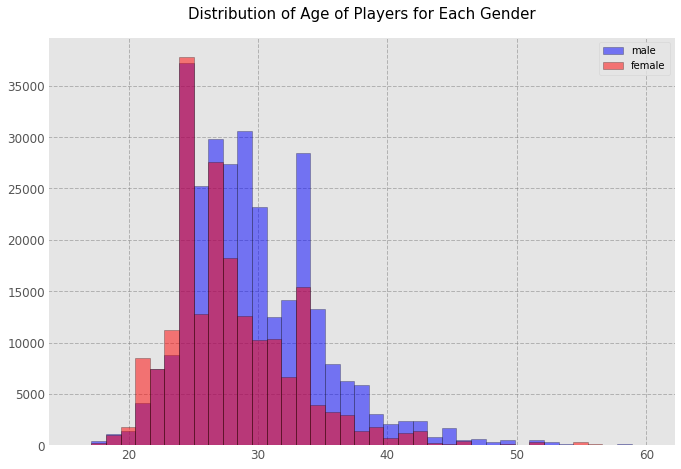

In [132]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of Players for Each Gender",fontsize=15,y=1.03)
plt.hist(y_ms,bins, label='male', alpha=.5, facecolor='blue',edgecolor = 'k')



#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_fs,bins, alpha=.5, label='female', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

It is very different for subjects. Most of the female subjects are in their twenties, and there is a large number of female subjects who are 24. I am not sure why this is the case, but I assume younger females prefer if someone esle takes an initiative.

In [96]:
y_ms = df['subject_age'][df['subject_gender'] == 'male']
y_fs = df['subject_age'][df['subject_gender'] == 'female']

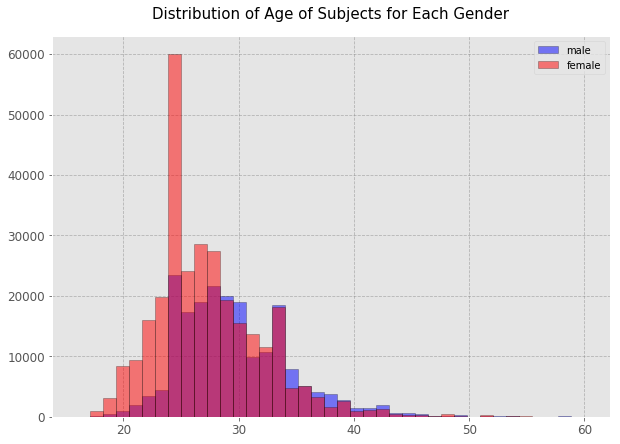

In [97]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of Subjects for Each Gender",fontsize=15,y=1.03)
plt.hist(y_ms,bins, label='male', alpha=.5, color='blue',edgecolor = 'k')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_fs,bins, alpha=.5, label='female', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

We can see the similar picture when we take a look at the histogram of age among straight male players and the subjects they liked. Again, straight female subjects are mostly in their early or mid-twenties while straight male players are in twenties and thirties. It is obvious that straight male players prefer their straight female subjects in their twenties. 

In [99]:
y_ms = df_like['player_age'][df_like['player_gender_orientation'] == 'MS']
y_fs = df_like['subject_age'][df_like['player_gender_orientation'] == 'MS']

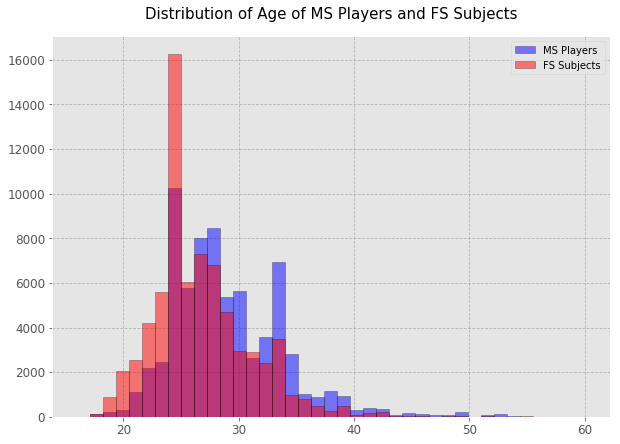

In [100]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of MS Players and FS Subjects",fontsize=15,y=1.03)
plt.hist(y_ms,bins, label='MS Players', alpha=.5, color='blue',edgecolor = 'k')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_fs,bins, alpha=.5, label='FS Subjects', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

This seems to be mutual. Below we can see that straight female players who are mostly in their twenties prefer straight male subjects who are the same age or older.

In [62]:
y_ms = df_like['player_age'][df_like['player_gender_orientation'] == 'FS']
y_fs = df_like['subject_age'][df_like['player_gender_orientation'] == 'FS']

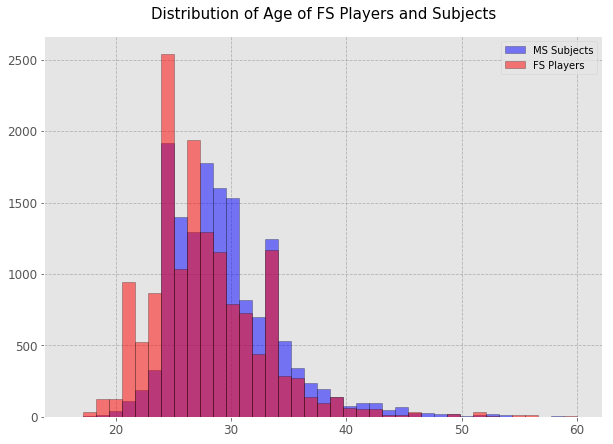

In [63]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of FS Players and MS Subjects",fontsize=15,y=1.03)
plt.hist(y_fs,bins, label='MS Subjects', alpha=.5, color='blue',edgecolor = 'k')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_ms,bins, alpha=.5, label='FS Players', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

The picture is a bit different for gay people. There are more gay male players in their twenties. Of course, gay mate players can also male with bi male subjects but I don't think it would change the overall picture.

In [68]:
y_ms = df_like['player_age'][df_like['player_gender_orientation'] == 'MG']
y_fs = df_like['subject_age'][df_like['player_gender_orientation'] == 'MG']

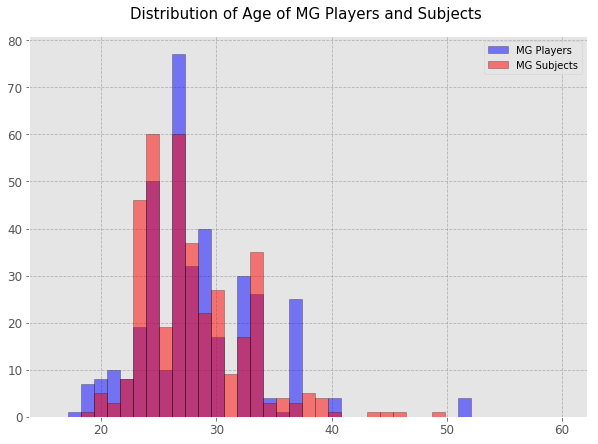

In [69]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of MG Players and Subjects ",fontsize=15,y=1.03)
plt.hist(y_ms,bins, label='MG Players', alpha=.5, color='blue',edgecolor = 'k')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_fs,bins, alpha=.5, label='MG Subjects', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

It is very different for gay females. Most of the gay female players are in their mid-thirties while age of gay female subjects they liked varies between twenties and forties.

In [76]:
y_ms = df_like['player_age'][df_like['player_gender_orientation'] == 'FG']
y_fs = df_like['subject_age'][df_like['player_gender_orientation'] == 'FG']

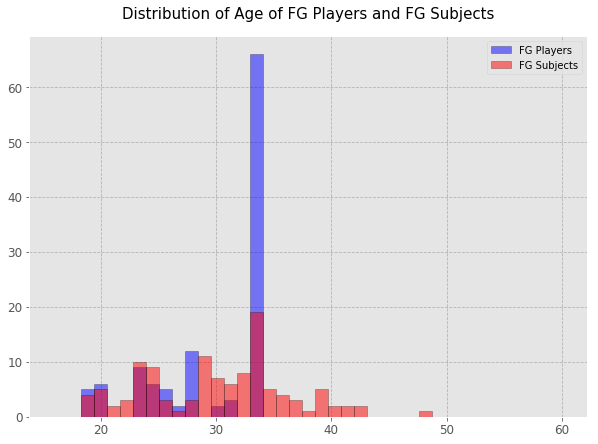

In [77]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of FG Players and FG Subjects",fontsize=15,y=1.03)
plt.hist(y_ms,bins, label='FG Players', alpha=.5, color='blue',edgecolor = 'k')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_fs,bins, alpha=.5, label='FG Subjects', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

Finally, bi people seem to have a different mating pattern. Bi male players are mostly in their late thirties while bi female players are mostly in their twenties.

In [81]:
y_ms = df_like['player_age'][df_like['player_gender_orientation'] == 'MB']
y_fs = df_like['subject_age'][df_like['player_gender_orientation'] == 'MB']

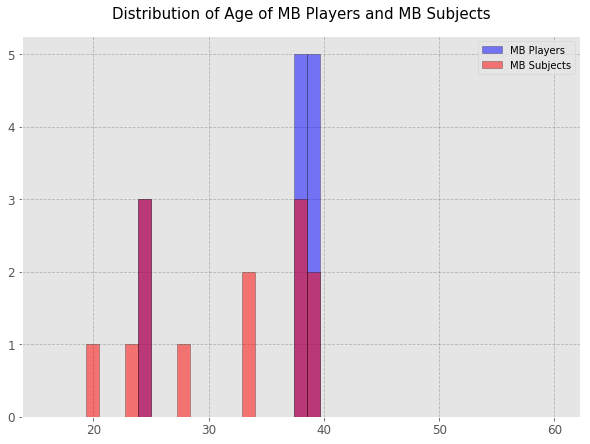

In [83]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of MB Players and MB Subjects",fontsize=15,y=1.03)
plt.hist(y_ms,bins, label='MB Players', alpha=.5, color='blue',edgecolor = 'k')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_fs,bins, alpha=.5, label='MB Subjects', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

In [92]:
y_ms = df_like['player_age'][df_like['player_gender_orientation'] == 'FB']
y_fs = df_like['subject_age'][df_like['player_gender_orientation'] == 'FB']

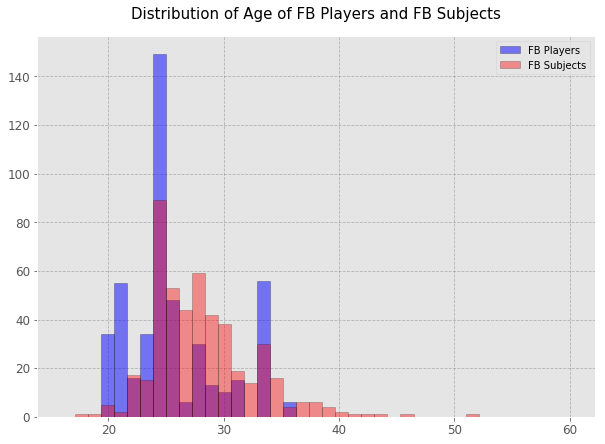

In [93]:
plt.style.use('ggplot')

bins = np.linspace(16, 60, 40)
plt.figure(figsize=(10,7))
plt.title("Distribution of Age of FB Players and FB Subjects",fontsize=15,y=1.03)
plt.hist(y_ms,bins, label='FB Players', alpha=.5, color='blue',edgecolor = 'k')

#histtype : {'bar', 'barstacked', 'step',  'stepfilled'}
plt.hist(y_fs,bins, alpha=.4, label='FB Subjects', color='red',edgecolor = 'k')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(loc='upper right', fontsize=10)
plt.grid(color='gray', linestyle='--', alpha=.5)

plt.show()

It is very interesting and actually somewhat contradicts social science research. Proximity is an important factor in mating. People prefer mate with someone who lives not far from them. However, the pattern below indicates that players like subjects who live farther. It is something that needs to be investigated. Somewhat, larger distance stops being an issue for the users of the application. It might be also a coincidence.

In [188]:
df.groupby('like')['distance'].mean().reset_index()

,like,distance
0,0,98.638464
1,1,122.051134


Below is also an interesting pattern, it seems that taller subjects are more likely to be liked.

In [92]:
df.groupby(['player_gender_orientation','like'])['subject_height'].mean().reset_index()

,player_gender_orientation,like,subject_height
0,FB,0,177.835417
1,FB,1,180.233051
2,FG,0,171.540107
3,FG,1,175.008621
4,FS,0,178.778113
5,FS,1,181.746824
6,MB,0,169.593985
7,MB,1,169.692308
8,MG,0,178.676875
9,MG,1,179.305630


The more times a subject has been saved previously, the more likely this subject to be liked. It is probably due to the fact that this subject seems to be more desirable in general.

In [93]:
df.groupby(['player_gender_orientation','like'])['subject_saved'].mean().reset_index()

,player_gender_orientation,like,subject_saved
0,FB,0,10.206326
1,FB,1,33.315678
2,FG,0,17.560428
3,FG,1,37.767241
4,FS,0,10.387967
5,FS,1,33.141634
6,MB,0,30.390977
7,MB,1,42.307692
8,MG,0,2.768125
9,MG,1,5.340483


Rating does not seem to have a definite pattern and its effect varies across gender-orientation groups. There might be either an interaction between gender orientation and rating or this pattern is a coincidence.  To establish this, I need to know more about the predictor 'subject_rated'. If there is an interaction, then including this interaction into a predictive model can significantly increase the model’s predictive accuracy.  

In [101]:
df.groupby(['player_gender_orientation','like'])['subject_rated'].mean().reset_index()


,player_gender_orientation,like,subject_rated
0,FB,0,156.826591
1,FB,1,154.699153
2,FG,0,138.316578
3,FG,1,165.267241
4,FS,0,152.727078
5,FS,1,146.959609
6,MB,0,149.548872
7,MB,1,145.461538
8,MG,0,26.005000
9,MG,1,25.549598


There are possibly more interesting patterns and anomalies, however, I will need more time to look into them. I would like to devote more time to building the algorithm.